# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import pytz
import numpy as np


%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv("C:/Users/Yvonne Colangelo/financial-palnner/Financial-Planner/api.env")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [102]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
#eth_data = requests.get(eth_url).json()

In [103]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_data['data']['1']['quotes']['CAD']['price'] * my_btc
my_eth_value = eth_data['data']['1027']['quotes']['CAD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27042.80
The current value of your 5.3 ETH is $8628.18


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [104]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [105]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv('API_KEY')
alpaca_secret_key = os.getenv('API_SECRET_KEY')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    api_key,
    alpaca_secret_key,
    api_version="v2")


In [106]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = end_date
).df



# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
agg_current_closing_price = df_portfolio[df_portfolio['symbol'] == 'AGG']['close']
spy_current_closing_price =  df_portfolio[df_portfolio['symbol'] == 'SPY']['close']

#Reorganise the dataframe
# Separate ticker data
# YOUR CODE HERE!
agg_data = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop(['symbol', 'trade_count', 'vwap'], axis = 1)
spy_data = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop(['symbol', 'trade_count', 'vwap'], axis = 1)


# Display sample data
df_portfolio = pd.concat([agg_data, spy_data], axis = 1, keys = ['AGG', 'SPY'])
#new_df =df_portfolio[ df_portfolio.rename(index={'timsestamp': 'time'})]

#df_portfolio.head()

df_portfolio

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                              SPY                                         
                             open      high       low   close     volume  
timestamp                                                                 
2020-05-01 04:00:00+00:00  285.31  290.6572  281.5200  282.83  125180028  
2020-05-04 04:00:00+00:00  280.73  283.9000  279.1300  283.59   80882213  
2020-05-05 04:00:00+00:00  286.64  289.2500  283.7134  286.15   79569939  
2020-05-06 04:00:00+00:00  288.05  288.4600  283.7800  284.34   73632628  
2020-05-07 04:00:00+00:00  287.75  289.7800  287.1300  287.70   75250412

In [107]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price =  df_portfolio['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [108]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy 
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [109]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
#getting total crypto assests and total shares
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
amount = [total_crypto, total_shares]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(index = ['crypto', 'shares'], columns= ['amount'])
df_savings['amount'] = amount
# Display savings DataFrame
display(df_savings)

,amount
crypto,35670.980846
shares,37515.500000


array([<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>],
      dtype=object)

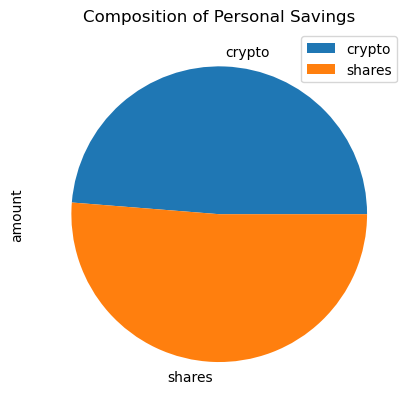

In [110]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(title={'Composition of Personal Savings'}, ylabel='amount', y = 'amount', subplots=True)

In [111]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
# get the total savings 
total_savings = total_crypto + total_shares

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congratulations on having enough money in your emergency fund')
elif total_savings == emergency_fund:
    print('Congratulations you have reached your target emergency fund')

else:
    print(f"You have {emergency_fund - total_savings} to reach your desired emergency target fund")

Congratulations on having enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [112]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()



In [113]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers2 = ['AGG', 'SPY']

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers2,
    timeframe,
    start = start_date,
    end = end_date
).df

historical_agg_data = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop(['symbol', 'trade_count', 'vwap'], axis = 1)
historical_spy_data = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop(['symbol', 'trade_count', 'vwap'], axis = 1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data= pd.concat([historical_agg_data, historical_spy_data], axis = 1, keys = ['AGG', 'SPY'])

# Display sample data
df_stock_data.head(10)


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2017-05-01 04:00:00+00:00  108.86  108.9599  108.6200  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.6790  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.7700  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.5500  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.5700  108.700  1421843   
2017-05-08 04:00:00+00:00  108.63  108.6700  108.4900  108.495  3568402   
2017-05-09 04:00:00+00:00  108.43  108.5100  108.4000  108.500  3084948   
2017-05-10 04:00:00+00:00  108.60  108.6600  108.4400  108.530  1653429   
2017-05-11 04:00:00+00:00  108.35  108.5400  108.3435  108.520  2331142   
2017-05-12 04:00:00+00:00  108.81  108.9400  108.7800  108.915  1329696   

                              SPY                                         
                             open      high      low     close    volume  
timestamp                                                                 
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.6300  66882521  
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.7600  57375732  
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.5200  73137731  
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.7400  61462732  
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.6800  62001269  
2017-05-08 04:00:00+00:00  239.75  239.9200  239.170  239.6700  48385730  
2017-05-09 04:00:00+00:00  239.96  240.1900  239.040  239.4400  51363200  
2017-05-10 04:00:00+00:00  239.39  239.8700  239.150  239.8600  54293799  
2017-05-11 04:00:00+00:00  239.35  239.5700  238.130  239.4592  62269354  
2017-05-12 04:00:00+00:00  239.08  239.4273  238.670  239.0500  53912730

In [194]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
class MCSimulation:
    """
    A Python class for runnning Monte Carlo simulation on portfolio price data. 
    
    ...
    
    Attributes
    ----------
    portfolio_data : pandas.DataFrame
        portfolio dataframe
    weights: list(float)
        portfolio investment breakdown
    nSim: int
        number of samples in simulation
    nTrading: int
        number of trading days to simulate
    simulated_return : pandas.DataFrame
        Simulated data from Monte Carlo
    confidence_interval : pandas.Series
        the 95% confidence intervals for simulated final cumulative returns
        
    """
    
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        """
        Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
        """
        
        # Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data.xs('close',level=1,axis=1).pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
           
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)
    
portfolio_data = df_stock_data


#portfolio_data = df_stock_data.copy(),  
data_simulation = MCSimulation(
    portfolio_data,
    weights = [.40,.60],
    num_simulation =100,
    num_trading_days = 252*30
)

In [195]:
# Printing the simulation input data
# YOUR CODE HERE!
data_simulation.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2017-05-01 04:00:00+00:00  108.86  108.9599  108.6200  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.6790  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.7700  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.5500  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.5700  108.700  1421843   
2017-05-08 04:00:00+00:00  108.63  108.6700  108.4900  108.495  3568402   
2017-05-09 04:00:00+00:00  108.43  108.5100  108.4000  108.500  3084948   
2017-05-10 04:00:00+00:00  108.60  108.6600  108.4400  108.530  1653429   
2017-05-11 04:00:00+00:00  108.35  108.5400  108.3435  108.520  2331142   
2017-05-12 04:00:00+00:00  108.81  108.9400  108.7800  108.915  1329696   

                                           SPY                               \
                          daily_return    open      high      low     close   
timestamp                                                                     
2017-05-01 04:00:00+00:00          NaN  238.68  239.1700  238.195  238.6300   
2017-05-02 04:00:00+00:00     0.001426  238.84  238.9800  238.300  238.7600   
2017-05-03 04:00:00+00:00    -0.000827  238.29  238.8775  237.700  238.5200   
2017-05-04 04:00:00+00:00    -0.001057  238.83  238.9225  237.780  238.7400   
2017-05-05 04:00:00+00:00     0.000184  239.19  239.7200  238.680  239.6800   
2017-05-08 04:00:00+00:00    -0.001886  239.75  239.9200  239.170  239.6700   
2017-05-09 04:00:00+00:00     0.000046  239.96  240.1900  239.040  239.4400   
2017-05-10 04:00:00+00:00     0.000276  239.39  239.8700  239.150  239.8600   
2017-05-11 04:00:00+00:00    -0.000092  239.35  239.5700  238.130  239.4592   
2017-05-12 04:00:00+00:00     0.003640  239.08  239.4273  238.670  239.0500   

                                                  
                             volume daily_return  
timestamp                                         
2017-05-01 04:00:00+00:00  66882521          NaN  
2017-05-02 04:00:00+00:00  57375732     0.000545  
2017-05-03 04:00:00+00:00  73137731    -0.001005  
2017-05-04 04:00:00+00:00  61462732     0.000922  
2017-05-05 04:00:00+00:00  62001269     0.003937  
2017-05-08 04:00:00+00:00  48385730    -0.000042  
2017-05-09 04:00:00+00:00  51363200    -0.000960  
2017-05-10 04:00:00+00:00  54293799     0.001754  
2017-05-11 04:00:00+00:00  62269354    -0.001671  
2017-05-12 04:00:00+00:00  53912730    -0.001709

In [196]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
data_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007104,0.998160,0.992295,0.997537,0.994733,1.001220,0.987521,0.992494,0.996425,0.995928,...,1.007850,1.002829,1.010120,1.006366,1.003948,1.011380,0.996492,0.996030,0.996380,0.988844
2,1.008797,0.999996,0.992701,1.001789,0.989602,0.980644,0.996373,1.003253,0.999323,1.001819,...,1.015381,1.001842,1.020774,1.006303,1.017607,1.015470,0.993111,0.992373,0.993004,1.004457
3,1.006814,1.000865,0.989440,1.002654,0.998682,1.003392,1.004374,1.008144,1.006253,0.998350,...,1.016381,1.000826,1.007834,1.004909,1.009636,1.020698,0.988924,0.997133,0.984768,0.994484
4,1.017585,0.987740,0.994473,0.995593,0.998910,1.009948,0.997014,1.000537,1.002209,1.003687,...,1.009466,1.010618,1.001096,0.999747,1.019200,1.021671,0.990543,1.001612,0.986560,0.986976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.413555,9.303290,26.149324,3.158118,10.478152,5.153536,6.656059,2.652065,15.715023,6.738795,...,5.804997,4.556124,14.701112,7.411684,6.162626,3.824405,16.977001,5.191213,13.705422,8.185521
7557,14.478842,9.366096,26.332558,3.172714,10.638640,5.218520,6.615648,2.658761,15.878944,6.668260,...,5.804236,4.555787,14.613296,7.453225,6.160256,3.792908,16.733056,5.126310,13.755982,8.224115
7558,14.470796,9.465926,26.159846,3.181307,10.645191,5.175133,6.657851,2.657462,15.872890,6.691482,...,5.921982,4.593674,14.507865,7.385827,6.168538,3.772189,16.873306,5.151280,13.743750,8.199427
7559,14.506578,9.486874,26.480255,3.181162,10.636460,5.128566,6.693938,2.672734,15.763859,6.737441,...,5.935290,4.577357,14.395899,7.389692,6.134961,3.790678,16.777870,5.101580,13.736965,8.293011


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

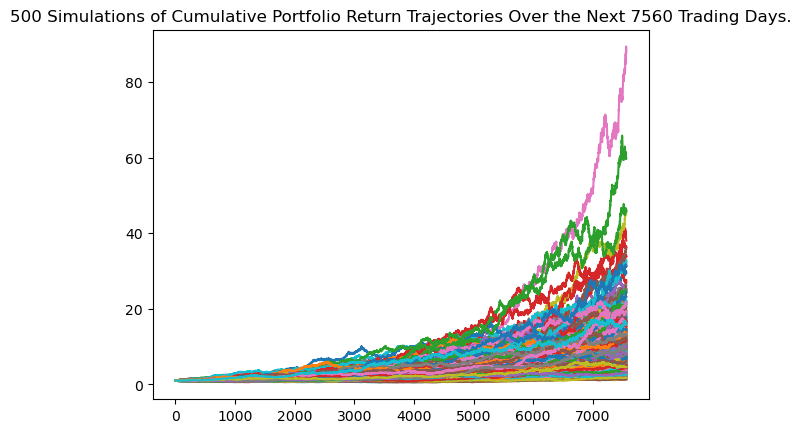

In [192]:
# Plot simulation outcomes
# YOUR CODE HERE!
data_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

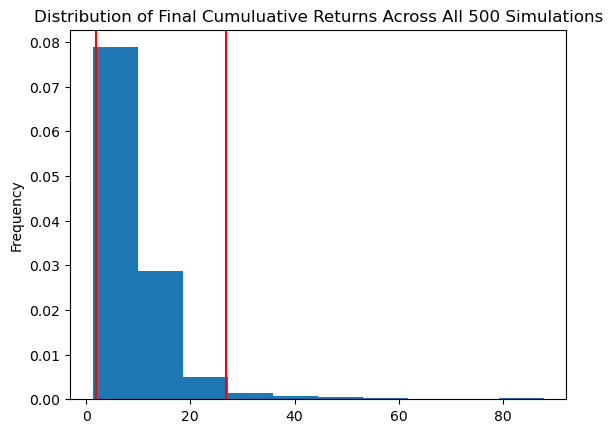

In [193]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
data_simulation.plot_distribution()

### Retirement Analysis

In [173]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summaries_statistics  = data_simulation.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summaries_statistics)

count           100.000000
mean              8.660811
std               6.772967
min               0.811234
25%               4.080871
50%               6.324093
75%              12.058550
max              48.998316
95% CI Lower      1.591779
95% CI Upper     22.729818
Name: 7560, dtype: float64


C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_176\732071893.py:167: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [174]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment * summaries_statistics['95% CI Lower']
ci_upper = initial_investment *summaries_statistics['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $31835.58 and $454596.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [176]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower1 = initial_investment2 * summaries_statistics['95% CI Lower']
ci_upper1 = initial_investment2 * summaries_statistics['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1:0.2f} and ${ci_upper1:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47753.37 and $681894.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [177]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
data = df_stock_data.copy()
five_year_simulation= MCSimulation(
    portfolio_data = data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*5
)


In [178]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
five_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002720,1.006863,1.002963,0.995140,1.018742,0.991146,0.985999,1.013489,1.004995,0.997992,...,0.992799,1.007501,0.989973,1.004084,0.990058,0.999794,0.991719,0.996450,0.996951,1.009498
2,1.006699,1.012101,1.009814,0.998346,1.031278,0.996128,0.986286,1.026445,0.997880,1.002741,...,1.000080,0.997129,0.993308,1.005062,0.984675,1.005188,0.990709,0.988321,0.995867,1.006031
3,1.012048,1.011420,1.009705,0.993037,1.049341,0.990216,0.986660,1.008688,0.995052,1.007441,...,0.987130,1.008359,0.988533,1.013542,0.983200,1.009885,0.978122,0.985131,0.999130,0.999993
4,1.005943,1.015087,1.012488,0.978709,1.075706,0.986165,0.993572,1.015203,0.989634,1.013567,...,0.993921,0.990035,0.981386,1.021505,0.966090,1.000522,0.977106,0.982296,1.006479,1.001308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.301993,0.921234,1.383164,1.189377,1.323076,2.049233,1.345665,0.927721,0.576423,1.458727,...,1.800002,1.148214,1.072951,1.143162,0.909258,0.847243,0.964711,0.999860,0.945623,1.040014
1257,1.316933,0.929277,1.391791,1.186885,1.329202,2.039280,1.325424,0.933085,0.572404,1.459594,...,1.807824,1.151904,1.074162,1.137850,0.903562,0.854202,0.964636,1.005777,0.956131,1.031120
1258,1.306993,0.926023,1.394874,1.174641,1.325691,2.024657,1.321488,0.936556,0.568840,1.451515,...,1.811867,1.144803,1.091199,1.140224,0.895988,0.850129,0.971216,0.998732,0.945378,1.027327
1259,1.306187,0.934966,1.379556,1.177589,1.320781,2.011602,1.325130,0.932372,0.564041,1.445604,...,1.793113,1.157309,1.091668,1.141861,0.899816,0.851733,0.959996,1.010157,0.949104,1.027661


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

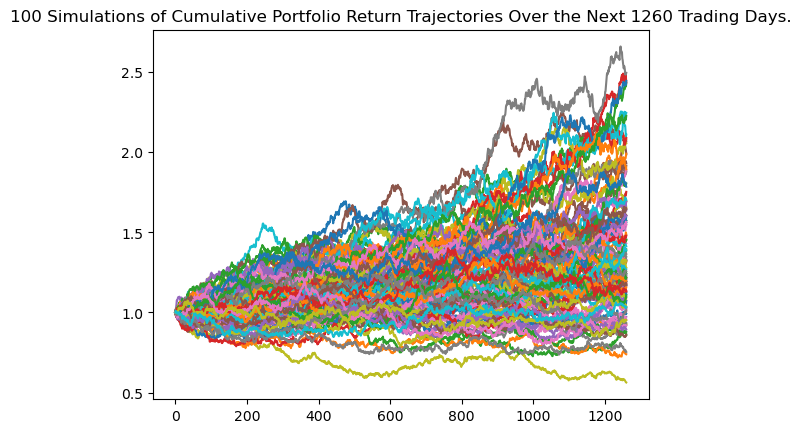

In [179]:
# Plot simulation outcomes
# YOUR CODE HERE!
five_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

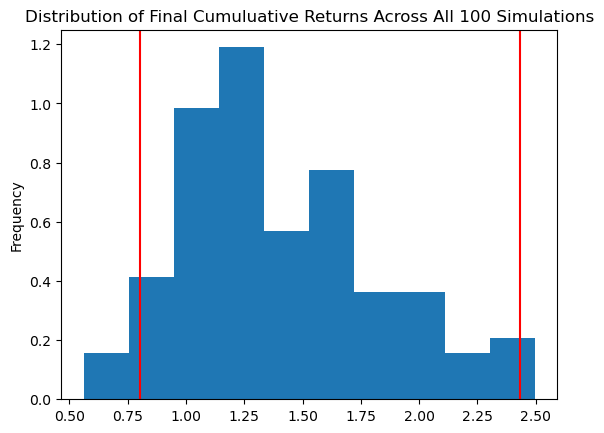

In [180]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
five_year_simulation.plot_distribution()

In [181]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_year_stat_sum  = five_year_simulation.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
five_year_stat_sum

C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_176\732071893.py:167: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean              1.410717
std               0.426051
min               0.562879
25%               1.104046
50%               1.323826
75%               1.650148
max               2.495955
95% CI Lower      0.803815
95% CI Upper      2.433718
Name: 1260, dtype: float64

In [182]:
# Set initial investment
# YOUR CODE HERE!
initial_investment2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = initial_investment2 * five_year_stat_sum['95% CI Lower']
ci_upper_five = initial_investment2 * five_year_stat_sum['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48228.92 and $146023.06


### Ten Years Retirement Option

In [183]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
data = df_stock_data.copy()
ten_year_simulation= MCSimulation(
    portfolio_data = data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*10
)

In [184]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017044,0.993817,1.003435,1.012953,1.004737,0.996464,0.990219,1.000495,1.003923,0.996189,...,1.003521,1.008824,0.996546,1.008167,0.994808,0.997651,1.003135,0.999154,0.995465,1.003516
2,1.020607,0.977433,1.000844,1.008552,1.009952,1.005223,0.993253,1.002034,1.007572,0.996721,...,1.010927,1.008411,1.007559,1.002805,0.998637,1.001969,0.988104,1.001977,0.997361,1.002899
3,1.028200,0.972362,1.001279,1.013214,1.005052,1.004465,0.994275,1.002003,1.017881,0.998219,...,1.025238,1.023441,0.998164,1.008231,0.997434,1.012004,0.978358,1.010420,0.992473,0.997835
4,1.029645,0.981553,0.998606,1.020635,1.008420,1.004643,1.002751,1.012048,1.005789,1.009079,...,1.034501,1.024801,1.012160,1.001347,0.990791,1.004649,0.969951,1.015026,0.999016,0.998980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.980674,1.125168,0.988170,1.663999,2.090015,2.960810,2.983593,2.170699,1.041743,1.155922,...,2.941309,1.636157,2.487709,3.113315,3.264837,1.198590,1.376861,1.629742,2.073878,0.982355
2517,3.999463,1.139407,0.985046,1.673928,2.078167,2.992433,2.955879,2.176438,1.044638,1.162427,...,2.951268,1.620864,2.472136,3.096720,3.253731,1.207830,1.362788,1.618121,2.093203,0.975292
2518,4.020929,1.136755,1.003510,1.687180,2.076363,3.012366,2.950212,2.169924,1.055817,1.165577,...,2.963882,1.642841,2.446012,3.102334,3.262938,1.207812,1.363018,1.601989,2.109542,0.982399
2519,4.031528,1.129641,0.989473,1.707559,2.071739,2.990197,2.973227,2.168992,1.061561,1.172870,...,2.953745,1.632702,2.455706,3.124689,3.278634,1.214813,1.378947,1.589688,2.106758,0.990764


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

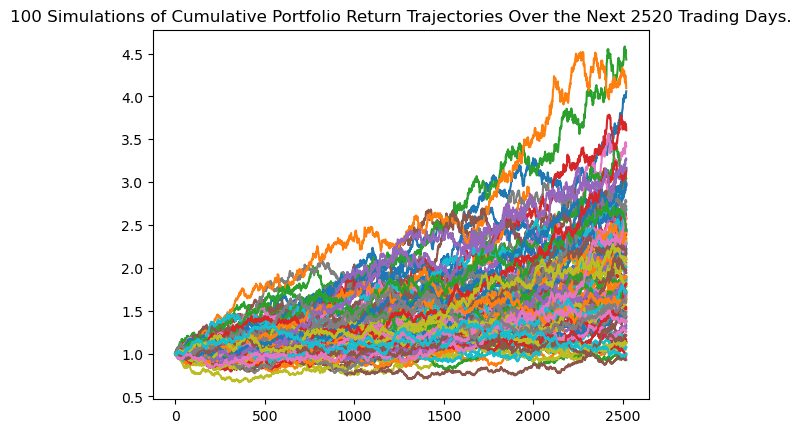

In [185]:
# Plot simulation outcomes
# YOUR CODE HERE!
ten_year_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

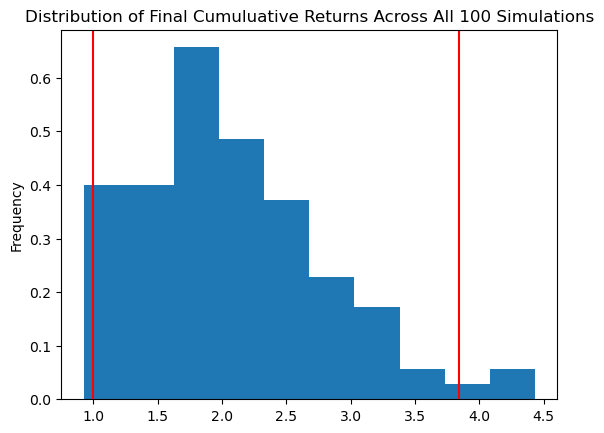

In [186]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ten_year_simulation.plot_distribution()

In [187]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_year_summaries_statistics  = ten_year_simulation.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
ten_year_summaries_statistics

C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_176\732071893.py:167: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean              2.067766
std               0.737413
min               0.928414
25%               1.528818
50%               1.957413
75%               2.434055
max               4.430085
95% CI Lower      0.996615
95% CI Upper      3.844045
Name: 2520, dtype: float64

In [188]:
# Set initial investment
# YOUR CODE HERE!
initial_investment3 = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = initial_investment3 * ten_year_summaries_statistics['95% CI Lower']
ci_upper_ten = initial_investment3 * ten_year_summaries_statistics['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59796.91 and $230642.69
